Import Libraries and read the CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prince
import seaborn as sns

sns.set()

customer_data = pd.read_csv('customer_data.csv')
customer_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look at the data to understand the fields.

In [2]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Look at the data types in the data frame

In [3]:
customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

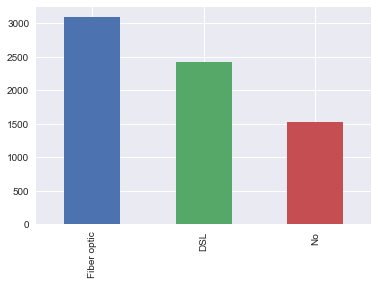

In [4]:
internet_counts = customer_data.InternetService.value_counts()
internet_counts.plot.bar()

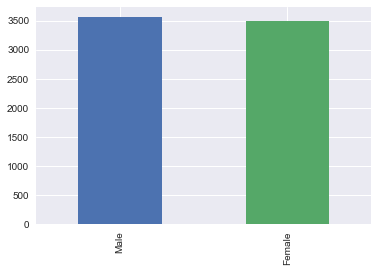

In [5]:
gender_counts = customer_data.gender.value_counts()
gender_counts.plot.bar()

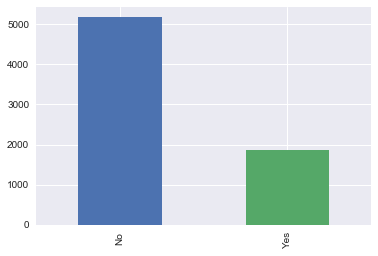

In [6]:
churn_counts = customer_data.Churn.value_counts()
churn_counts.plot.bar()

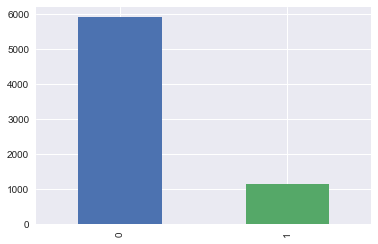

In [7]:
senior_counts = customer_data.SeniorCitizen.value_counts()
senior_counts.plot.bar()

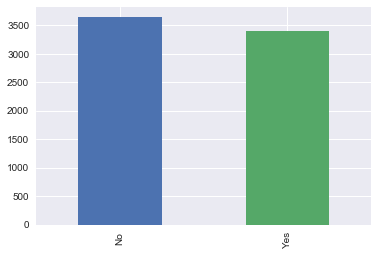

In [8]:
partner_counts = customer_data.Partner.value_counts()
partner_counts.plot.bar()

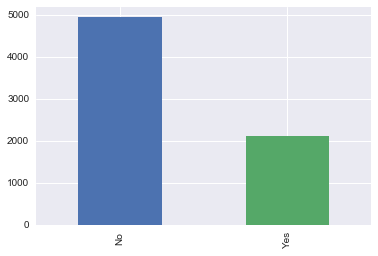

In [9]:
dependent_count = customer_data.Dependents.value_counts()
dependent_count.plot.bar()

In [10]:
customer_data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

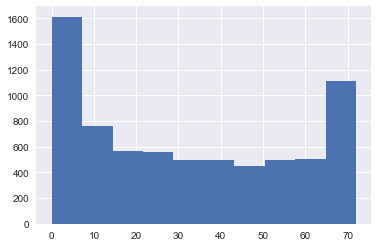

In [11]:
customer_data.tenure.hist()

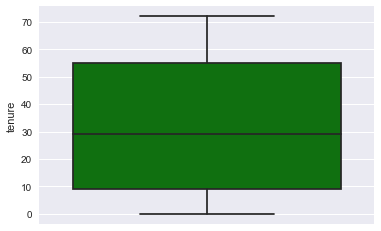

In [12]:
sns.boxplot(customer_data.tenure, color='green', orient = 'v')

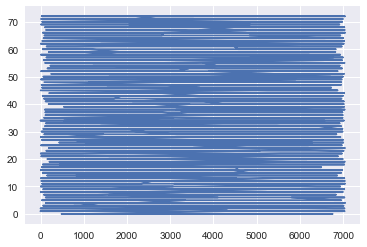

In [13]:
customer_data.tenure.sort_values().plot.line()

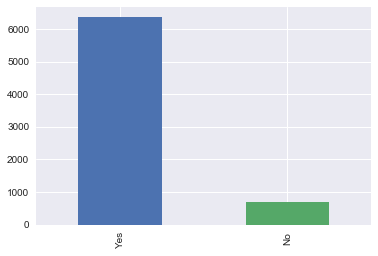

In [14]:
phone_count = customer_data.PhoneService.value_counts()
phone_count.plot.bar()

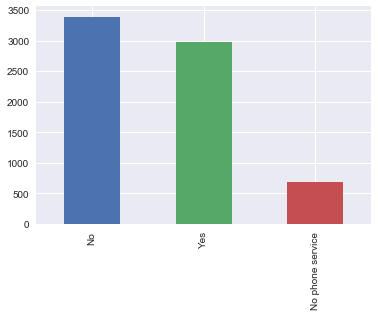

In [15]:
multi_line_count = customer_data.MultipleLines.value_counts()
multi_line_count.plot.bar()

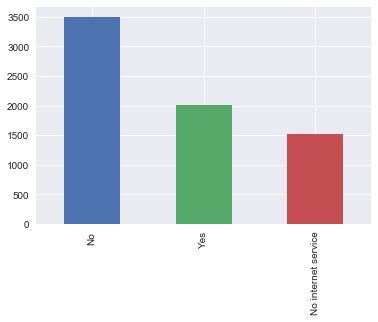

In [16]:
ols_count = customer_data.OnlineSecurity.value_counts()
ols_count.plot.bar()

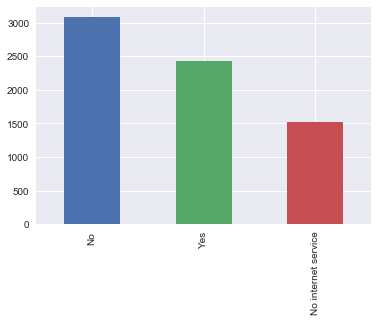

In [17]:
olb_count = customer_data.OnlineBackup.value_counts()
olb_count.plot.bar()

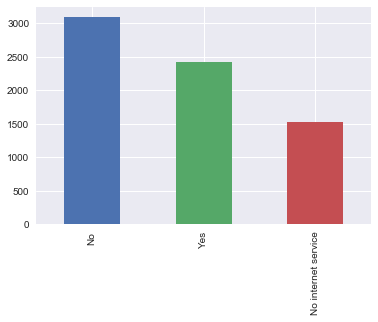

In [18]:
device_protection_count = customer_data.DeviceProtection.value_counts()
device_protection_count.plot.bar()

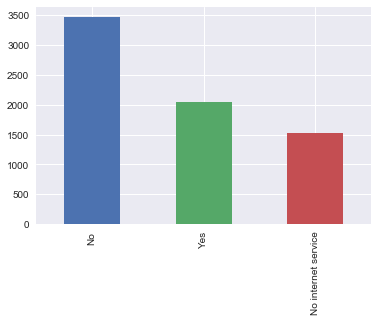

In [19]:
ts_count = customer_data.TechSupport.value_counts()
ts_count.plot.bar()

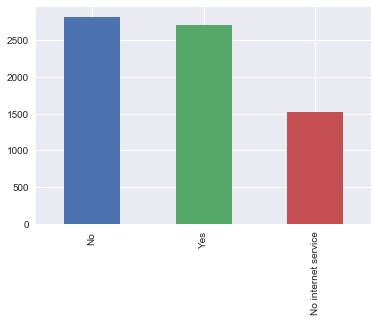

In [20]:
streaming_tv_counts = customer_data.StreamingTV.value_counts()
streaming_tv_counts.plot.bar()

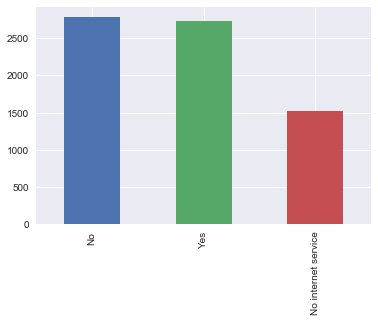

In [21]:
streaming_movie_counts = customer_data.StreamingMovies.value_counts()
streaming_movie_counts.plot.bar()

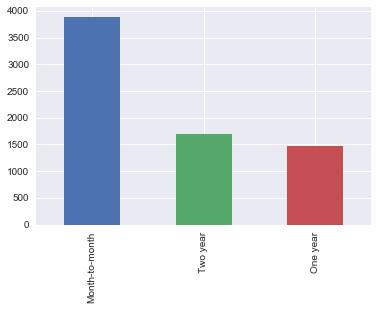

In [22]:
contract_counts = customer_data.Contract.value_counts()
contract_counts.plot.bar()

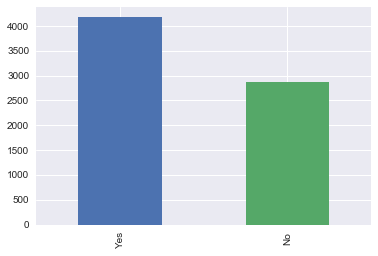

In [23]:
paperless_count = customer_data.PaperlessBilling.value_counts()
paperless_count.plot.bar()

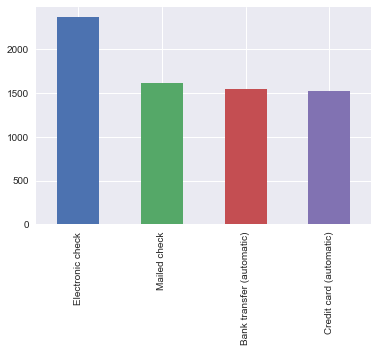

In [24]:
payment_method_counts = customer_data.PaymentMethod.value_counts()
payment_method_counts.plot.bar()

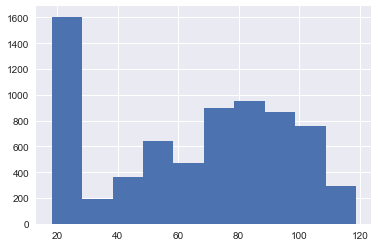

In [25]:
customer_data.MonthlyCharges.hist()

In [26]:
customer_data.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Looks like the MEAN charges are \$64.76 or approx. $65/month, but the median is closer to 70.

In [27]:
customer_data.MonthlyCharges.mode()

0    20.05
dtype: float64

The most common amount is \$20/month.

In [29]:
customer_data.TotalCharges = customer_data.TotalCharges.map(lambda x: x if x != ' ' else 0)
customer_data.TotalCharges = customer_data.TotalCharges.astype(float)
customer_data.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

In [31]:
customer_data.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

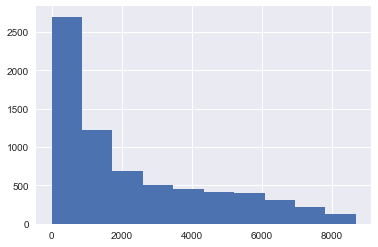

In [32]:
customer_data.TotalCharges.hist()

In [596]:
pd.crosstab(customer_data.InternetService, [customer_data.Churn, customer_data.tenure])

Churn           No                                      ... Yes               \
tenure          0    1   2   3   4   5   6   7   8   9  ...  63 64 65  66 67   
InternetService                                         ...                    
DSL              5   93  39  39  36  26  26  38  36  23 ...   0  2  2   2  1   
Fiber optic      0   32  35  34  22  22  15  20  17  31 ...   4  2  7  11  9   
No               6  108  41  33  35  21  29  22  28  19 ...   0  0  0   0  0   

Churn                           
tenure          68 69 70 71 72  
InternetService                 
DSL              1  1  2  1  2  
Fiber optic      8  7  9  5  4  
No               0  0  0  0  0  

[3 rows x 145 columns]

In [33]:
customer_data.gender = customer_data.gender.map({'Male': 1, 'Female': 0})
customer_data.Partner = customer_data.Partner.map({'Yes': 1, 'No': 0})
customer_data.Dependents = customer_data.Dependents.map({'Yes': 1, 'No':0})
customer_data.PhoneService = customer_data.PhoneService.map({'Yes':1,'No':0})
customer_data.MultipleLines = customer_data.MultipleLines.map({'No phone service': 0, 'No': 1, 'Yes': 2})
customer_data.InternetService = customer_data.InternetService.map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
customer_data.OnlineSecurity = customer_data.OnlineSecurity.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.OnlineBackup = customer_data.OnlineBackup.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.DeviceProtection = customer_data.DeviceProtection.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.TechSupport = customer_data.TechSupport.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingTV = customer_data.StreamingTV.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingMovies = customer_data.StreamingMovies.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.Contract = customer_data.Contract.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
customer_data.PaperlessBilling = customer_data.PaperlessBilling.map({'No': 0, 'Yes': 1})
customer_data.PaymentMethod = customer_data.PaymentMethod.map({'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
customer_data.Churn = customer_data.Churn.map({'Yes':1, 'No':0})
customer_data = customer_data.drop(columns=['customerID'])
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,1


In [53]:
pca = prince.PCA(n_components = 2)
fit = pca.fit(customer_data)
fit = fit.transform(customer_data)
pca.column_correlations(customer_data)

,0,1
gender,0.014092,0.009722
SeniorCitizen,-0.221409,-0.206624
Partner,-0.156578,0.543182
Dependents,0.086255,0.460700
tenure,-0.378493,0.800825
PhoneService,0.011369,0.099544
MultipleLines,-0.314870,0.196418
InternetService,-0.827268,-0.338153
OnlineSecurity,-0.790206,-0.019200
OnlineBackup,-0.836221,-0.056306


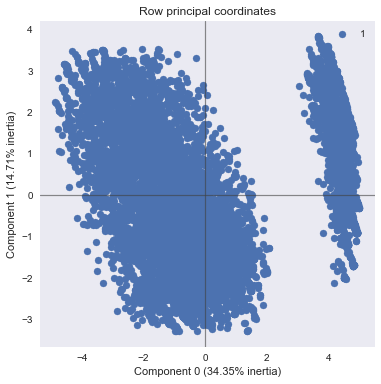

In [54]:
pca.plot_row_coordinates(customer_data)